In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


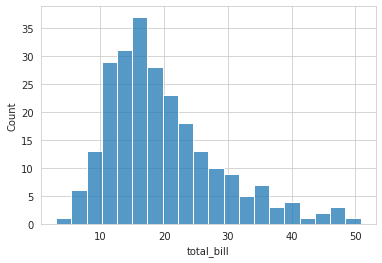

In [7]:
sns.set_style("whitegrid") # white
sns.histplot(tips['total_bill'], bins = 20)

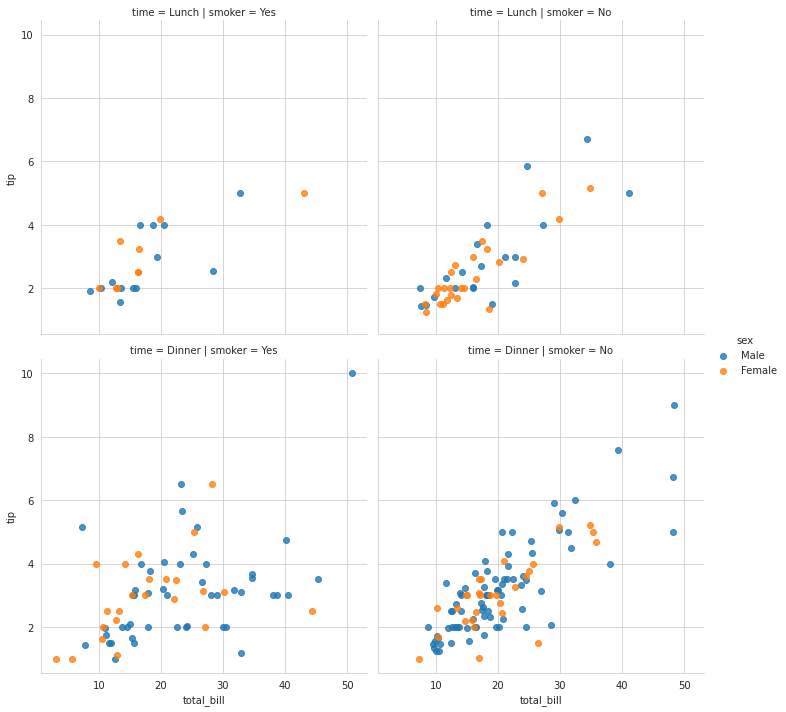

In [30]:
sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg = False, hue='sex',
           col = "smoker", row = "time") # 다변량

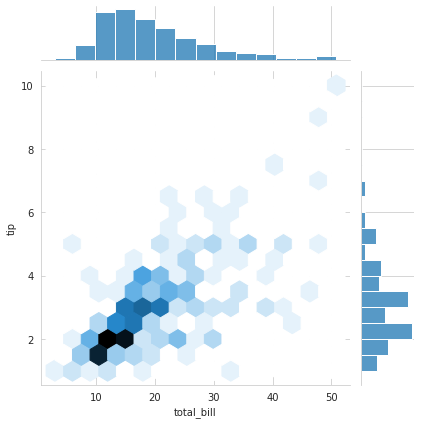

In [11]:
# 산점도 + 히스토그램
sns.jointplot(x='total_bill', y='tip', data=tips, kind = 'hex')

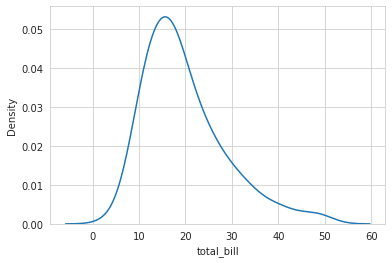

In [13]:
# 밀도 함수 그래프
sns.kdeplot(tips['total_bill'])

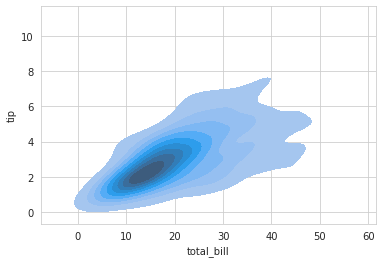

In [15]:
sns.kdeplot(x='total_bill', y='tip', data=tips, shade=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


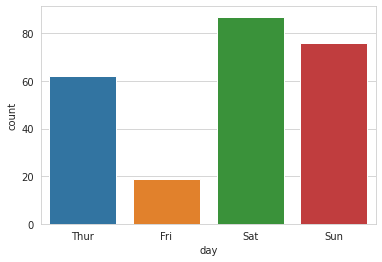

In [16]:
sns.countplot(tips['day'])

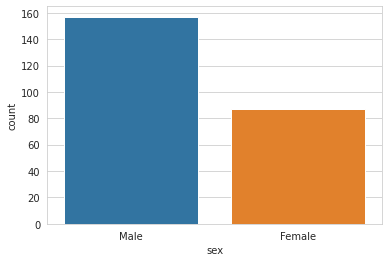

In [17]:
sns.countplot(tips['sex'])

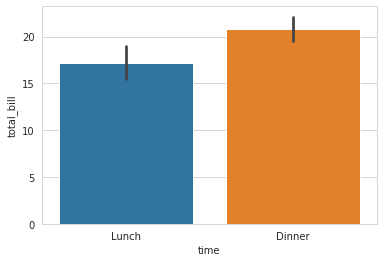

In [18]:
sns.barplot(x='time', y='total_bill', data=tips) # 평균 막대 그래프

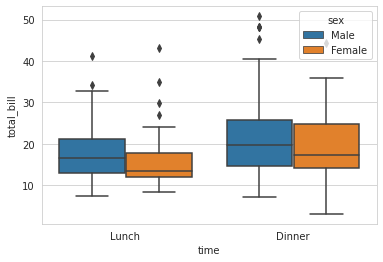

In [26]:
sns.boxplot(x='time', y='total_bill', data=tips, hue='sex')

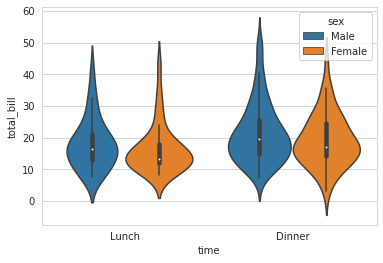

In [27]:
sns.violinplot(x='time', y='total_bill', data=tips, hue='sex')

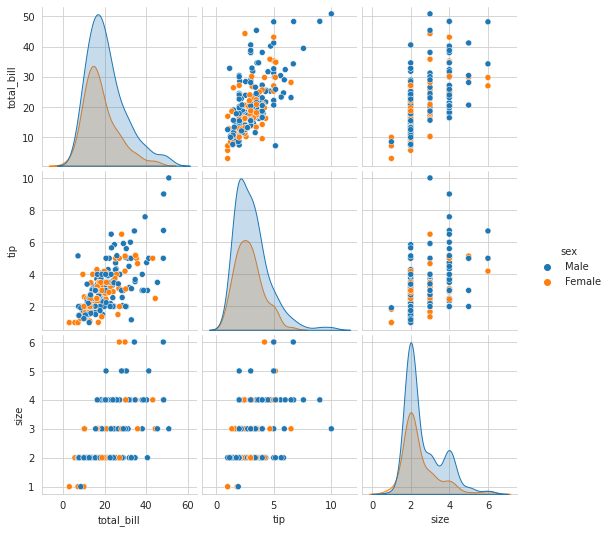

In [28]:
sns.pairplot(tips, hue='sex')

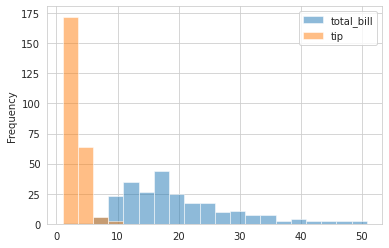

In [36]:
# pandas : 간단하게 그려볼 때

tips[['total_bill', 'tip']].plot.hist(bins = 20, alpha = 0.5)

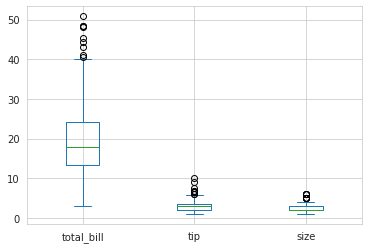

In [37]:
tips.plot.box()

In [46]:
# 데이터프레임 합치기

df1 = pd.read_csv("/content/concat_1.csv")
df2 = pd.read_csv("/content/concat_2.csv")
df3 = pd.read_csv("/content/concat_3.csv")

In [47]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [40]:
df2

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [41]:
df3

,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [45]:
result = pd.concat([df1, df2, df3], ignore_index = True)
result

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [51]:
result = pd.concat([df1, df2, df3], axis = 1, ignore_index = True) # 0이면 행방향, 1이면 열방향
result

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [50]:
result['A']

,A,A,A
0,a0,a4,a8
1,a1,a5,a9
2,a2,a6,a10
3,a3,a7,a11


In [53]:
# 열 이름이 다른 데이터프레임이 존재한다면 합쳐질까?

df2.columns = ['A', 'C', 'E', 'F']
df2

,A,C,E,F
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [54]:
pd.concat([df1, df2, df3])

,A,B,C,D,E,F
0,a0,b0,c0,d0,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN
0,a4,NaN,b4,NaN,c4,d4
1,a5,NaN,b5,NaN,c5,d5
2,a6,NaN,b6,NaN,c6,d6
3,a7,NaN,b7,NaN,c7,d7
0,a8,b8,c8,d8,NaN,NaN
1,a9,b9,c9,d9,NaN,NaN


In [56]:
df2.index = [0, 2, 4, 6]
df2

,A,C,E,F
0,a4,b4,c4,d4
2,a5,b5,c5,d5
4,a6,b6,c6,d6
6,a7,b7,c7,d7


In [57]:
pd.concat([df1, df2, df3], axis = 1)

,A,B,C,D,A,C,E,F,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN,a9,b9,c9,d9
2,a2,b2,c2,d2,a5,b5,c5,d5,a10,b10,c10,d10
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN,a11,b11,c11,d11
4,NaN,NaN,NaN,NaN,a6,b6,c6,d6,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,a7,b7,c7,d7,NaN,NaN,NaN,NaN


In [58]:
# 스마트하게 데이터프레임 합치기

# 날씨 정보
person = pd.read_csv("survey_person.csv")
site = pd.read_csv("survey_site.csv")
survey = pd.read_csv("survey_survey.csv")
visited = pd.read_csv("survey_visited.csv")

In [60]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [63]:
result = visited.merge(site, left_on = "site", right_on = "name")
result

,ident,site,dated,name,lat,long
0,619,DR-1,1927-02-08,DR-1,-49.85,-128.57
1,622,DR-1,1927-02-10,DR-1,-49.85,-128.57
2,844,DR-1,1932-03-22,DR-1,-49.85,-128.57
3,734,DR-3,1939-01-07,DR-3,-47.15,-126.72
4,735,DR-3,1930-01-12,DR-3,-47.15,-126.72
5,751,DR-3,1930-02-26,DR-3,-47.15,-126.72
6,752,DR-3,NaN,DR-3,-47.15,-126.72
7,837,MSK-4,1932-01-14,MSK-4,-48.87,-123.40


In [62]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [66]:
# visited, survey
# person, survey

result = visited.merge(survey, left_on = "ident", right_on = "taken")
del result['taken']
result

,ident,site,dated,person,quant,reading
0,619,DR-1,1927-02-08,dyer,rad,9.82
1,619,DR-1,1927-02-08,dyer,sal,0.13
2,622,DR-1,1927-02-10,dyer,rad,7.80
3,622,DR-1,1927-02-10,dyer,sal,0.09
4,734,DR-3,1939-01-07,pb,rad,8.41
5,734,DR-3,1939-01-07,lake,sal,0.05
6,734,DR-3,1939-01-07,pb,temp,-21.50
7,735,DR-3,1930-01-12,pb,rad,7.22
8,735,DR-3,1930-01-12,NaN,sal,0.06
9,735,DR-3,1930-01-12,NaN,temp,-26.00


In [64]:
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


In [59]:
person

,ident,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [67]:
person.merge(survey, left_on = "ident", right_on = "person")

,ident,personal,family,taken,person,quant,reading
0,dyer,William,Dyer,619,dyer,rad,9.82
1,dyer,William,Dyer,619,dyer,sal,0.13
2,dyer,William,Dyer,622,dyer,rad,7.80
3,dyer,William,Dyer,622,dyer,sal,0.09
4,pb,Frank,Pabodie,734,pb,rad,8.41
5,pb,Frank,Pabodie,734,pb,temp,-21.50
6,pb,Frank,Pabodie,735,pb,rad,7.22
7,pb,Frank,Pabodie,751,pb,rad,4.35
8,pb,Frank,Pabodie,751,pb,temp,-18.50
9,lake,Anderson,Lake,734,lake,sal,0.05


In [72]:
# 각각의 기준열 이름이 같을 때, on = "기준열"

# 열을 행으로 내리는 방법 // 머신러닝
pew = pd.read_csv("pew.csv")
pew2 = pd.melt(pew, id_vars = "religion", var_name = "income", value_name = "count")
pew2

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [71]:
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [74]:
# melting
billboard = pd.read_csv("billboard.csv")
billboard2 = pd.melt(billboard, id_vars = ['year', 'artist', 'track', 'time', 'date.entered'],
                     var_name = 'week', value_name = 'rating')
billboard2

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [76]:
# melting하기
ebola = pd.read_csv("country_timeseries.csv")
ebola2 = pd.melt(ebola, id_vars = ['Date', 'Day'])
ebola2

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [78]:
ebola_split = ebola2['variable'].str.split("_")
ebola_split

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: variable, Length: 1952, dtype: object

In [79]:
state = ebola_split.str[0]
state

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [80]:
country = ebola_split.str[1]
country

0       Guinea
1       Guinea
2       Guinea
3       Guinea
4       Guinea
         ...  
1947      Mali
1948      Mali
1949      Mali
1950      Mali
1951      Mali
Name: variable, Length: 1952, dtype: object

In [81]:
ebola2['State'] = state
ebola2['Country'] = country

del ebola2['variable']
ebola2

,Date,Day,value,State,Country
0,1/5/2015,289,2776.0,Cases,Guinea
1,1/4/2015,288,2775.0,Cases,Guinea
2,1/3/2015,287,2769.0,Cases,Guinea
3,1/2/2015,286,NaN,Cases,Guinea
4,12/31/2014,284,2730.0,Cases,Guinea
...,...,...,...,...,...
1947,3/27/2014,5,NaN,Deaths,Mali
1948,3/26/2014,4,NaN,Deaths,Mali
1949,3/25/2014,3,NaN,Deaths,Mali
1950,3/24/2014,2,NaN,Deaths,Mali


In [83]:
# 최고온도, 최저온도
# 행을 열로 올리는 방법
weather = pd.read_csv("weather.csv")
weather2 = pd.melt(weather, id_vars = ['id', 'year', 'month', 'element'],
                   var_name = 'day', value_name = 'temp')
weather2

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [85]:
# 열을 행으로 내리는 것 : melt
# 행을 열로 올리는 것 : pivot_table

weather3 = weather2.pivot_table(index = ['id', 'year', 'month', 'day'],
                                columns = "element",
                                values = 'temp',
                                dropna = False)
weather3.reset_index()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d1,NaN,NaN
1,MX17004,2010,1,d10,NaN,NaN
2,MX17004,2010,1,d11,NaN,NaN
3,MX17004,2010,1,d12,NaN,NaN
4,MX17004,2010,1,d13,NaN,NaN
...,...,...,...,...,...,...
336,MX17004,2010,12,d5,NaN,NaN
337,MX17004,2010,12,d6,27.8,10.5
338,MX17004,2010,12,d7,NaN,NaN
339,MX17004,2010,12,d8,NaN,NaN


In [97]:
# 내 교실 학생들의 키 데이터 : 평균
# 내 교실 학생들의 부모님 소득 데이터 : 중앙값
# 상황에 따라서 0으로 채움, 특정값
# 시계열 : 시간에 흐름을 갖고 있는 데이터

# 누락값 처리 : 데이터를 보고 스스로 잘 판단해주셔야함

dates = ['2022/12/01', '2022/12/02', '2022/12/06', '2022/12/10']
dates = pd.to_datetime(dates, format = "%Y/%m/%d")

box = [1, nan, nan, 10]
s = pd.Series(box, index = dates)
s

2022-12-01     1.0
2022-12-02     NaN
2022-12-06     NaN
2022-12-10    10.0
dtype: float64

In [98]:
s.mean()

5.5

In [99]:
s.fillna(s.mean())

2022-12-01     1.0
2022-12-02     5.5
2022-12-06     5.5
2022-12-10    10.0
dtype: float64

In [100]:
s.fillna(0)

2022-12-01     1.0
2022-12-02     0.0
2022-12-06     0.0
2022-12-10    10.0
dtype: float64

In [101]:
s.fillna(method = "ffill") # front fill

2022-12-01     1.0
2022-12-02     1.0
2022-12-06     1.0
2022-12-10    10.0
dtype: float64

In [102]:
s.fillna(method = "bfill") # back fill

2022-12-01     1.0
2022-12-02    10.0
2022-12-06    10.0
2022-12-10    10.0
dtype: float64

In [88]:
from numpy import nan

# for i in 시리즈:
#     if i == nan:
#         ~~~~~~

# 무한대랑 무한대가 같지 않다.

nan == True

False

In [89]:
nan == False

False

In [90]:
nan == 0

False

In [91]:
nan == nan

False

In [92]:
pd.isnull(nan)

True

In [93]:
pd.isnull(5)

False

In [104]:
# 흐름에 맞게 누락값을 채우고자 하신다면

s.interpolate()

2022-12-01     1.0
2022-12-02     4.0
2022-12-06     7.0
2022-12-10    10.0
dtype: float64

In [105]:
s.interpolate(method = 'time')

2022-12-01     1.0
2022-12-02     2.0
2022-12-06     6.0
2022-12-10    10.0
dtype: float64

In [108]:
# ebola에 있는 누락값을 적절하게 채워주세요.
ebola = pd.read_csv("country_timeseries.csv")

ebola = ebola.interpolate()
ebola = ebola.fillna(method = 'ffill')
ebola = ebola.fillna(method = 'bfill')
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1786.0,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0
1,1/4/2015,288,2775.0,8166.0,9780.0,20.0,1.0,4.0,1.0,7.0,1781.0,3496.0,2943.0,8.0,0.0,1.0,0.0,6.0
2,1/3/2015,287,2769.0,8166.0,9722.0,20.0,1.0,4.0,1.0,7.0,1767.0,3496.0,2915.0,8.0,0.0,1.0,0.0,6.0
3,1/2/2015,286,2749.5,8157.0,9677.5,20.0,1.0,4.0,1.0,7.0,1753.0,3496.0,2871.0,8.0,0.0,1.0,0.0,6.0
4,12/31/2014,284,2730.0,8115.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3471.0,2827.0,8.0,0.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [110]:
import seaborn as sns

tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [112]:
tips['total_bill'].astype("float32")

0      16.990000
1      10.340000
2      21.010000
3      23.680000
4      24.590000
         ...    
239    29.030001
240    27.180000
241    22.670000
242    17.820000
243    18.780001
Name: total_bill, Length: 244, dtype: float32

In [113]:
tips['total_bill'].astype("str")

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: object

In [116]:
tips2 = tips.head(10)
tips2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [118]:
tips2.iloc[[0,2,4,6], 0] = "Hello"
tips2

,total_bill,tip,sex,smoker,day,time,size
0,Hello,Hello,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,Hello,Hello,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,Hello,Hello,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,Hello,Hello,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [119]:
tips2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  10 non-null     object  
 1   tip         10 non-null     object  
 2   sex         10 non-null     category
 3   smoker      10 non-null     category
 4   day         10 non-null     category
 5   time        10 non-null     category
 6   size        10 non-null     int64   
dtypes: category(4), int64(1), object(2)
memory usage: 984.0+ bytes


In [120]:
tips2['total_bill'].astype("float32")

ValueError: ignored

In [123]:
tips2['total_bill'] = pd.to_numeric(tips2['total_bill'], errors = 'coerce')
tips2

<ipython-input-123-3813a6ea919c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips2['total_bill'] = pd.to_numeric(tips2['total_bill'], errors = 'coerce')


,total_bill,tip,sex,smoker,day,time,size
0,NaN,Hello,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,NaN,Hello,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,NaN,Hello,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,NaN,Hello,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [124]:
tips2.dropna() # 누락값이 단 한개라도 있는 행은 지운다.

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [131]:
# 1. [성, 이름] 열을 활용해서 "성명" 열 만들기 (성, 이름 열 지우기)
# 2. 사원번호앞4자리 열을 만들기(State, Country)

df = pd.read_excel("직원 정보.xlsx", sheet_name = "Sheet1")

df['성명'] = df['성'] + df['이름']

del df['성']
del df['이름']

df['사원번호앞4자리'] = df['사원번호'].str[:4]
df

,순번,영문명,사원번호,주소,전화번호,성명,사원번호앞4자리
0,1,kim cheolsu,2005-1478345,강서구 공항로 20455,010-1000-8735,김철수,2005
1,2,park jongsu,2010-1345972,강서구 대저중앙로 3009,010-1000-8736,박종수,2010
2,3,kim hana,2012-1487234,강서구 하덕로 1002,010-1000-8737,김하나,2012
3,4,lee baekman,2001-3747234,기장군 기장읍 연화100길,010-1000-8738,이백만,2001
4,5,baek osip,2002-4972944,기장군 기장읍 차성로,010-1000-8739,백오십,2002
5,6,youngwoong jaejun,2011-2382747,기장군 기장읍 기장해안로,010-1000-8740,영웅재준,2011
6,7,hyun bin,2000-2395634,남구 지게골로 10-2,010-1000-8741,현빈,2000
7,8,jang hana,2015-1626816,동래구 온천장로107-100,010-1000-8742,장하나,2015
8,9,yoo dooul,2016-4323930,동래구 동래로116,010-1000-8743,유두울,2016
9,10,chae il,2012-3967845,북구 효열로 2502,010-1000-8744,채일,2012


In [134]:
df['전화번호'].str.replace("-", "", 1)

0    0101000-8735
1    0101000-8736
2    0101000-8737
3    0101000-8738
4    0101000-8739
5    0101000-8740
6    0101000-8741
7    0101000-8742
8    0101000-8743
9    0101000-8744
Name: 전화번호, dtype: object

In [135]:
df['주소'].str.len()

0    14
1    15
2    13
3    15
4    12
5    14
6    13
7    16
8    11
9    12
Name: 주소, dtype: int64

In [142]:
# 합, 평균 열 만들기
df = pd.read_excel("성적 처리.xlsx", sheet_name = "Sheet1")

# df['합'] = df['국어'] + df['영어'] + df['수학'] + df['사회'] + df['과학']

df["합"] = df.iloc[:, 2:].sum(axis = 1)
df['평균'] = df['합'] / 5
df

,반,성명,국어,영어,수학,사회,과학,합,평균
0,1반,홍길동,93,80,94,73,64,404,80.8
1,5반,백일홍,93,63,76,84,92,408,81.6
2,3반,이삼상,94,74,86,90,70,414,82.8
3,4반,정말로,83,55,64,90,65,357,71.4
4,5반,한번도,87,95,66,75,60,383,76.6
5,4반,이철수,53,81,59,88,69,350,70.0
6,3반,김영자,71,71,51,84,57,334,66.8
7,5반,다니엘,87,54,95,71,97,404,80.8
8,2반,이미로,59,54,75,90,82,360,72.0
9,1반,신성삼,64,66,59,91,86,366,73.2


In [144]:
# 3등이 2명이면, 둘다 3.5등 다음 등수는 5등
df["순위"] = df['평균'].rank(method = "average", ascending=False)
df

,반,성명,국어,영어,수학,사회,과학,합,평균,순위
0,1반,홍길동,93,80,94,73,64,404,80.8,3.5
1,5반,백일홍,93,63,76,84,92,408,81.6,2.0
2,3반,이삼상,94,74,86,90,70,414,82.8,1.0
3,4반,정말로,83,55,64,90,65,357,71.4,12.5
4,5반,한번도,87,95,66,75,60,383,76.6,7.5
5,4반,이철수,53,81,59,88,69,350,70.0,14.0
6,3반,김영자,71,71,51,84,57,334,66.8,17.0
7,5반,다니엘,87,54,95,71,97,404,80.8,3.5
8,2반,이미로,59,54,75,90,82,360,72.0,11.0
9,1반,신성삼,64,66,59,91,86,366,73.2,10.0


In [145]:
# 3등이 2명이면, 둘다 4등 다음 등수는 5등
df["순위"] = df['평균'].rank(method = "max", ascending=False)
df

,반,성명,국어,영어,수학,사회,과학,합,평균,순위
0,1반,홍길동,93,80,94,73,64,404,80.8,4.0
1,5반,백일홍,93,63,76,84,92,408,81.6,2.0
2,3반,이삼상,94,74,86,90,70,414,82.8,1.0
3,4반,정말로,83,55,64,90,65,357,71.4,13.0
4,5반,한번도,87,95,66,75,60,383,76.6,8.0
5,4반,이철수,53,81,59,88,69,350,70.0,14.0
6,3반,김영자,71,71,51,84,57,334,66.8,17.0
7,5반,다니엘,87,54,95,71,97,404,80.8,4.0
8,2반,이미로,59,54,75,90,82,360,72.0,11.0
9,1반,신성삼,64,66,59,91,86,366,73.2,10.0


In [146]:
# 3등이 2명이면, 둘다 3등 다음 등수는 5등
df["순위"] = df['평균'].rank(method = "min", ascending=False)
df

,반,성명,국어,영어,수학,사회,과학,합,평균,순위
0,1반,홍길동,93,80,94,73,64,404,80.8,3.0
1,5반,백일홍,93,63,76,84,92,408,81.6,2.0
2,3반,이삼상,94,74,86,90,70,414,82.8,1.0
3,4반,정말로,83,55,64,90,65,357,71.4,12.0
4,5반,한번도,87,95,66,75,60,383,76.6,7.0
5,4반,이철수,53,81,59,88,69,350,70.0,14.0
6,3반,김영자,71,71,51,84,57,334,66.8,17.0
7,5반,다니엘,87,54,95,71,97,404,80.8,3.0
8,2반,이미로,59,54,75,90,82,360,72.0,11.0
9,1반,신성삼,64,66,59,91,86,366,73.2,10.0


In [147]:
# 3등이 2명이면, 첫번째로 발견된 3등이 3등이고 다음 발견한 3등이 4등
df["순위"] = df['평균'].rank(method = "first", ascending=False)
df

,반,성명,국어,영어,수학,사회,과학,합,평균,순위
0,1반,홍길동,93,80,94,73,64,404,80.8,3.0
1,5반,백일홍,93,63,76,84,92,408,81.6,2.0
2,3반,이삼상,94,74,86,90,70,414,82.8,1.0
3,4반,정말로,83,55,64,90,65,357,71.4,12.0
4,5반,한번도,87,95,66,75,60,383,76.6,7.0
5,4반,이철수,53,81,59,88,69,350,70.0,14.0
6,3반,김영자,71,71,51,84,57,334,66.8,17.0
7,5반,다니엘,87,54,95,71,97,404,80.8,4.0
8,2반,이미로,59,54,75,90,82,360,72.0,11.0
9,1반,신성삼,64,66,59,91,86,366,73.2,10.0


In [148]:
# min방법과 같다. 다음 등수를 4등
df["순위"] = df['평균'].rank(method = "dense", ascending=False)
df

,반,성명,국어,영어,수학,사회,과학,합,평균,순위
0,1반,홍길동,93,80,94,73,64,404,80.8,3.0
1,5반,백일홍,93,63,76,84,92,408,81.6,2.0
2,3반,이삼상,94,74,86,90,70,414,82.8,1.0
3,4반,정말로,83,55,64,90,65,357,71.4,10.0
4,5반,한번도,87,95,66,75,60,383,76.6,6.0
5,4반,이철수,53,81,59,88,69,350,70.0,11.0
6,3반,김영자,71,71,51,84,57,334,66.8,14.0
7,5반,다니엘,87,54,95,71,97,404,80.8,3.0
8,2반,이미로,59,54,75,90,82,360,72.0,9.0
9,1반,신성삼,64,66,59,91,86,366,73.2,8.0


In [151]:
df.sort_values(by = "순위", ascending=False)

,반,성명,국어,영어,수학,사회,과학,합,평균,순위
10,3반,케로로,56,76,52,64,65,313,62.6,16.0
16,1반,소행성,62,58,58,62,73,313,62.6,16.0
14,4반,우주로,96,54,51,54,78,333,66.6,15.0
6,3반,김영자,71,71,51,84,57,334,66.8,14.0
17,1반,유비비,67,94,61,61,52,335,67.0,13.0
11,2반,장발장,85,51,64,80,68,348,69.6,12.0
5,4반,이철수,53,81,59,88,69,350,70.0,11.0
12,4반,백설공,75,57,77,57,91,357,71.4,10.0
3,4반,정말로,83,55,64,90,65,357,71.4,10.0
8,2반,이미로,59,54,75,90,82,360,72.0,9.0


In [158]:
# kto_201001~202005 (한국관광공사)
# 미니 프로젝트 (외국인 입국객 데이터)
# 관광객 데이터 변화 추이

# 문제 : 전체비율(%) 열 만들기
df = pd.read_excel("kto_201001.xlsx", header = 1,
                   usecols = "A:G", skipfooter = 4)
df["관광객비율(%)"] = df["관광"] / df['계'] * 100
total = df['관광'].sum()
df['전체비율(%)'] = df['관광'] / total * 100

,국적,관광,상용,공용,유학/연수,기타,계,관광객비율(%),전체비율(%)
0,아시아주,329131,18238,421,4339,80916,433045,76.003880,41.057413
1,일본,202825,1750,89,549,3971,209184,96.960093,25.301384
2,대만,35788,41,17,37,516,36399,98.321382,4.464370
3,홍콩,13874,55,0,21,595,14545,95.386731,1.730711
4,마카오,554,0,0,0,0,554,100.000000,0.069109
...,...,...,...,...,...,...,...,...,...
62,아프리카 기타,349,594,25,86,296,1350,25.851852,0.043536
63,기타대륙,10,3,0,0,0,13,76.923077,0.001247
64,국적미상,10,3,0,0,0,13,76.923077,0.001247
65,교포소계,0,0,0,0,22537,22537,0.000000,0.000000


In [164]:
total_box = []
for i in range(2010, 2021):
    for j in range(1, 13):
        # try 안에서 에러가 나면 에러를 발생시키지 않고, except를 실행해라.
        try:
            year = str(i)
            month = str(j).zfill(2) # 무조건 2자리로 채워라
            df = pd.read_excel("kto_{}.xlsx".format(year+month), 
                            header = 1, usecols = 'A:G', skipfooter=4)
            df["관광객비율(%)"] = df["관광"] / df['계'] * 100
            total = df['관광'].sum()
            df['전체비율(%)'] = df['관광'] / total * 100
            df['년'] = year
            df['월'] = month
            df['기준년월'] = "{}-{}".format(year, month)
            total_box.append(df)
        except:
            pass

In [165]:
len(total_box)

125

In [166]:
df = pd.concat(total_box, ignore_index=True)
df

,국적,관광,상용,공용,유학/연수,기타,계,관광객비율(%),전체비율(%),년,월,기준년월
0,아시아주,329131,18238,421,4339,80916,433045,76.003880,41.057413,2010,01,2010-01
1,일본,202825,1750,89,549,3971,209184,96.960093,25.301384,2010,01,2010-01
2,대만,35788,41,17,37,516,36399,98.321382,4.464370,2010,01,2010-01
3,홍콩,13874,55,0,21,595,14545,95.386731,1.730711,2010,01,2010-01
4,마카오,554,0,0,0,0,554,100.000000,0.069109,2010,01,2010-01
...,...,...,...,...,...,...,...,...,...,...,...,...
8370,아프리카 기타,3,1,3,6,118,131,2.290076,0.024546,2020,05,2020-05
8371,기타대륙,1,0,0,0,3,4,25.000000,0.008182,2020,05,2020-05
8372,국적미상,1,0,0,0,3,4,25.000000,0.008182,2020,05,2020-05
8373,교포소계,0,0,0,0,790,790,0.000000,0.000000,2020,05,2020-05


In [168]:
df['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [169]:
# 중국
df[df['국적'] == '중국']

,국적,관광,상용,공용,유학/연수,기타,계,관광객비율(%),전체비율(%),년,월,기준년월
18,중국,40425,11930,55,2751,36091,91252,44.300399,5.042812,2010,01,2010-01
85,중국,60590,7907,68,29546,42460,140571,43.102774,6.784615,2010,02,2010-02
152,중국,50330,13549,174,14924,62480,141457,35.579717,4.613689,2010,03,2010-03
219,중국,84252,13306,212,2199,47711,147680,57.050379,7.753770,2010,04,2010-04
286,중국,89056,12325,360,2931,49394,154066,57.803798,8.476035,2010,05,2010-05
...,...,...,...,...,...,...,...,...,...,...,...,...
8058,중국,393336,2813,99,10433,75000,481681,81.659023,19.084772,2020,01,2020-01
8125,중국,49520,715,11,20753,33087,104086,47.576043,4.912932,2020,02,2020-02
8192,중국,5040,115,2,7388,4050,16595,30.370594,8.000762,2020,03,2020-03
8259,중국,522,71,0,1112,2230,3935,13.265565,5.082765,2020,04,2020-04


In [171]:
for i in df['국적'].unique():
    sample = df[df['국적'] == i]
    sample.to_excel("[국적별 관광객 데이터] {}.xlsx".format(i))

In [172]:
china = df[df['국적'] == '중국']
china

,국적,관광,상용,공용,유학/연수,기타,계,관광객비율(%),전체비율(%),년,월,기준년월
18,중국,40425,11930,55,2751,36091,91252,44.300399,5.042812,2010,01,2010-01
85,중국,60590,7907,68,29546,42460,140571,43.102774,6.784615,2010,02,2010-02
152,중국,50330,13549,174,14924,62480,141457,35.579717,4.613689,2010,03,2010-03
219,중국,84252,13306,212,2199,47711,147680,57.050379,7.753770,2010,04,2010-04
286,중국,89056,12325,360,2931,49394,154066,57.803798,8.476035,2010,05,2010-05
...,...,...,...,...,...,...,...,...,...,...,...,...
8058,중국,393336,2813,99,10433,75000,481681,81.659023,19.084772,2020,01,2020-01
8125,중국,49520,715,11,20753,33087,104086,47.576043,4.912932,2020,02,2020-02
8192,중국,5040,115,2,7388,4050,16595,30.370594,8.000762,2020,03,2020-03
8259,중국,522,71,0,1112,2230,3935,13.265565,5.082765,2020,04,2020-04


([<matplotlib.axis.XTick at 0x7f7b34f38790>,
 <a list of 11 Text major ticklabel objects>)

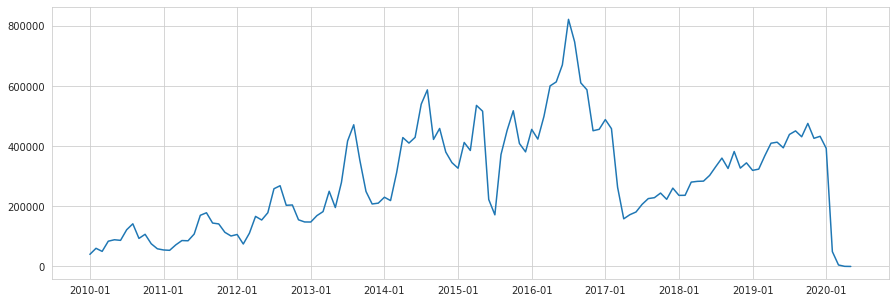

In [176]:
plt.figure(figsize = (15, 5))
plt.plot(china['기준년월'], china['관광'])
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01',
            '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

In [177]:
china_pivot = china.pivot_table(index='년', columns = '월', values = '관광')
china_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)


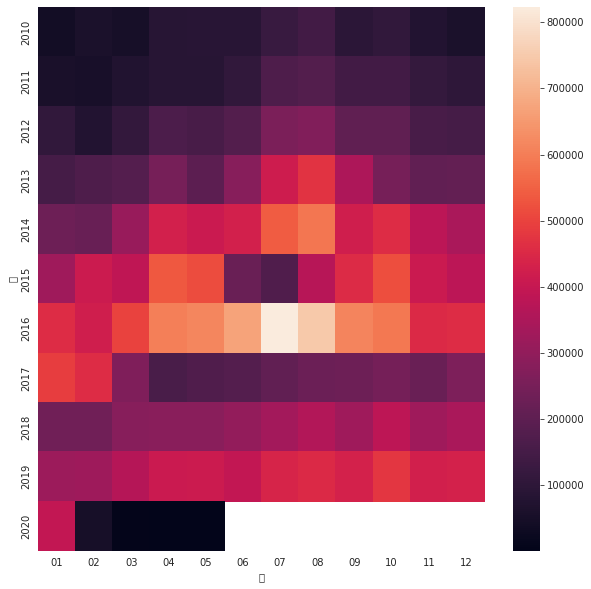

In [179]:
plt.figure(figsize = (10, 10))
sns.heatmap(china_pivot)